
# Predicting Customer Churn in the Telecom Industry using Machine Learning

**Project Overview**  
This project aims to develop a predictive model to identify customers at risk of churning in the telecom industry. Using the "Churn in Telecoms" dataset from Kaggle, we apply advanced machine learning techniques to analyze patterns of customer behavior and enhance churn predictions. Key tasks include feature engineering, model selection, evaluation, and deployment strategy, alongside model interpretability and monitoring for practical, real-world impact.


## 1. Problem Definition and Dataset Analysis




The `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.





> Note that for customer churn problems a more appropriate technique is something called survival analysis, but we'll just treat this problem as a binary classification problem.   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import shap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [6]:
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv", encoding="utf-8",)

train_df, test_df = train_test_split(df, test_size=0.3, random_state=66) #Dividing original data into train and test data

In [3]:
train_df.shape, test_df.shape

((2333, 21), (1000, 21))

In [4]:
train_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3072,TX,75,415,417-4456,no,no,0,305.1,106,51.87,...,115,15.98,235.4,116,10.59,8.5,5,2.30,0,True
1000,MI,133,408,387-9137,no,no,0,277.3,138,47.14,...,117,19.41,117.3,103,5.28,12.8,4,3.46,2,True
1910,NM,182,415,382-7999,no,no,0,69.1,114,11.75,...,109,19.58,256.7,96,11.55,6.5,4,1.76,0,False
310,MN,62,415,366-7912,no,no,0,248.7,109,42.28,...,118,18.70,265.7,78,11.96,13.2,2,3.56,1,True
3299,NC,73,408,362-8378,no,no,0,187.8,95,31.93,...,143,12.68,201.4,113,9.06,11.0,4,2.97,2,False


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 3072 to 1044
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null   in

In [6]:
train_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,100.663523,437.069010,8.278611,179.217360,100.098157,30.467497,199.602786,99.859408,16.966468,200.932919,99.924561,9.042075,10.231805,4.414488,2.763125,1.530219
std,39.513762,42.296703,13.797340,54.360434,20.201605,9.241250,50.884217,19.762504,4.325164,50.242506,19.684004,2.260961,2.792427,2.417080,0.753914,1.299347
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.200000,87.000000,24.340000,164.700000,87.000000,14.000000,167.300000,87.000000,7.530000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.200000,100.000000,30.460000,200.300000,100.000000,17.030000,202.600000,100.000000,9.120000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,215.900000,114.000000,36.700000,233.500000,113.000000,19.850000,235.100000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,232.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,381.900000,166.000000,17.190000,20.000000,19.000000,5.400000,9.000000


In [7]:
dist = train_df["churn"].value_counts(normalize=True)
dist

churn
False    0.859408
True     0.140592
Name: proportion, dtype: float64



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



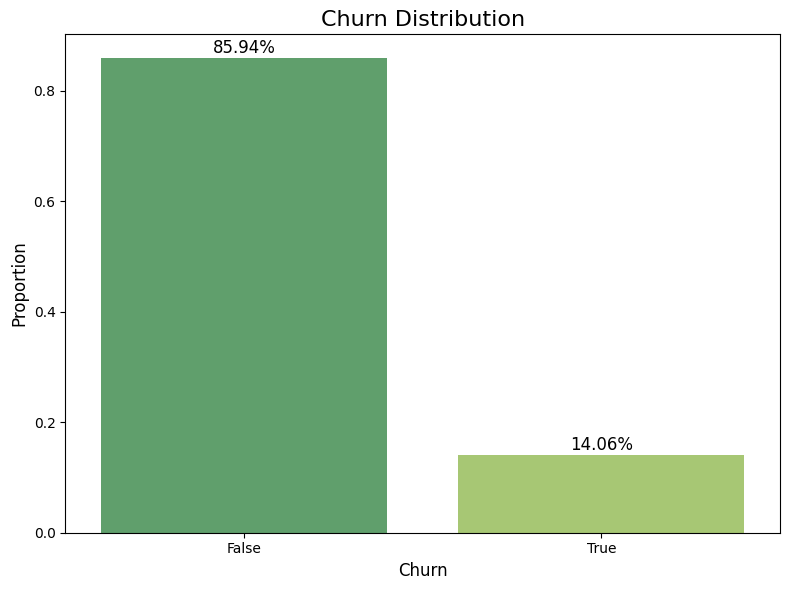

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dist.index, y=dist.values, palette="summer")
plt.title("Churn Distribution", fontsize=16)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

# Display the percentage on top of the bars
for i, value in enumerate(dist.values):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()

This churn problem involves a class imbalance, with only 15% of the target values marked as positive (True). Because of this, accuracy alone can be misleading. Although class imbalance usually requires attention, the imbalance here isn’t severe enough to demand correction right away. Instead, we’ll review precision and recall scores to see if the imbalance significantly affects results. If it does, we’ll take steps to address it.

### Checking missing / NULL and Dupicated Values

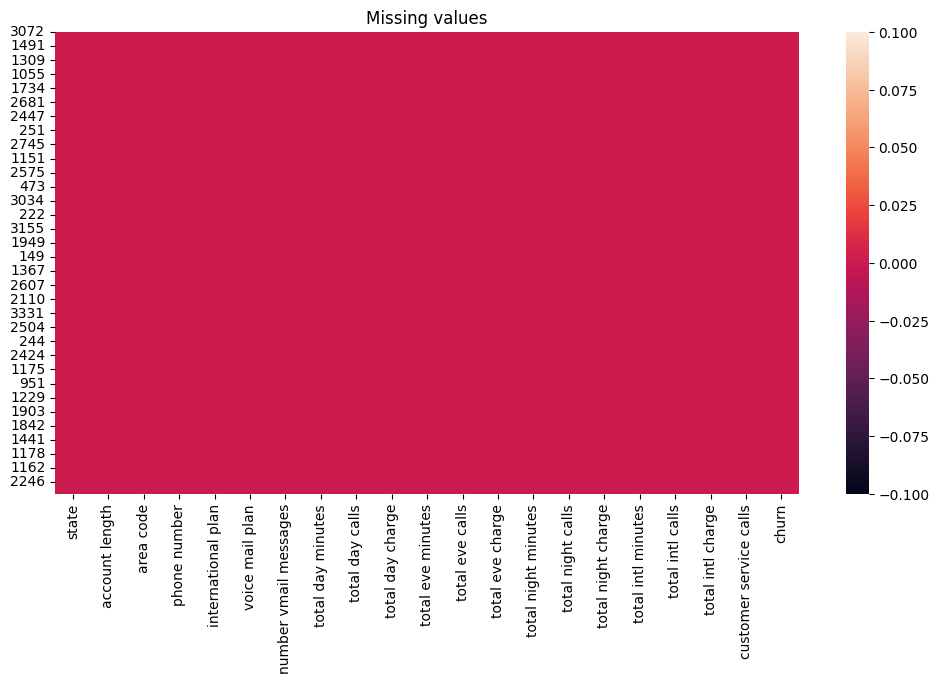

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull())
plt.title('Missing values')
plt.show()

In [10]:
train_df.isnull().sum(), ("==="*25), test_df.isnull().sum()

(state                     0
 account length            0
 area code                 0
 phone number              0
 international plan        0
 voice mail plan           0
 number vmail messages     0
 total day minutes         0
 total day calls           0
 total day charge          0
 total eve minutes         0
 total eve calls           0
 total eve charge          0
 total night minutes       0
 total night calls         0
 total night charge        0
 total intl minutes        0
 total intl calls          0
 total intl charge         0
 customer service calls    0
 churn                     0
 dtype: int64,
 '===========================================================================',
 state                     0
 account length            0
 area code                 0
 phone number              0
 international plan        0
 voice mail plan           0
 number vmail messages     0
 total day minutes         0
 total day calls           0
 total day charge          0
 total

In [11]:
train_df.duplicated().any()

False

the data has no null values and duplicated data

### Exploratory Data Analysis (EDA)

Going through the data I came up with some exploratory questions that I would like to answer and explore:

1. How does customer usage (day, evening, night, international minutes) relate to churn?

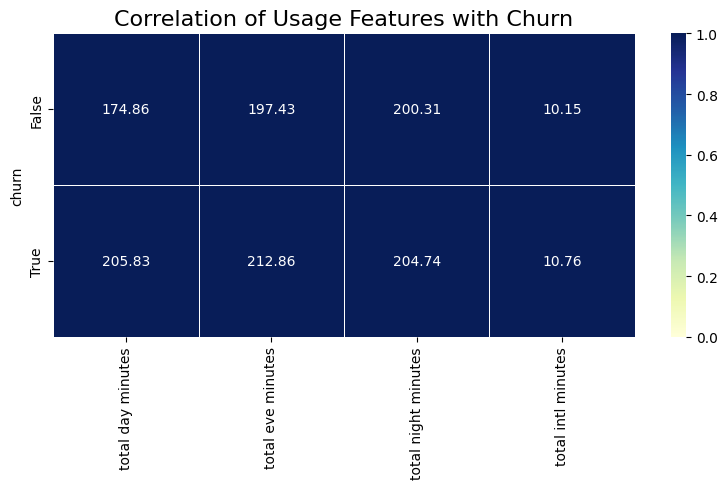

In [12]:
usage_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Correlation of usage features with churn
corr = train_df[usage_columns + ['churn']].groupby('churn').mean()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation of Usage Features with Churn', fontsize=16)
plt.tight_layout()
plt.show()


2. Does the number of customer service calls influence churn?

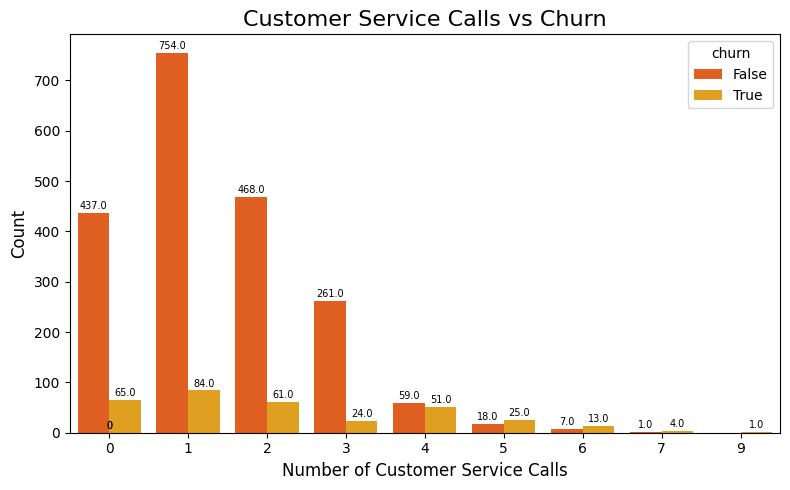

In [13]:
# Customer service calls vs churn
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='customer service calls', hue='churn', data=train_df, palette="autumn")
plt.title('Customer Service Calls vs Churn', fontsize=16)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=7, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

3. How do voice mail and international plans impact churn?

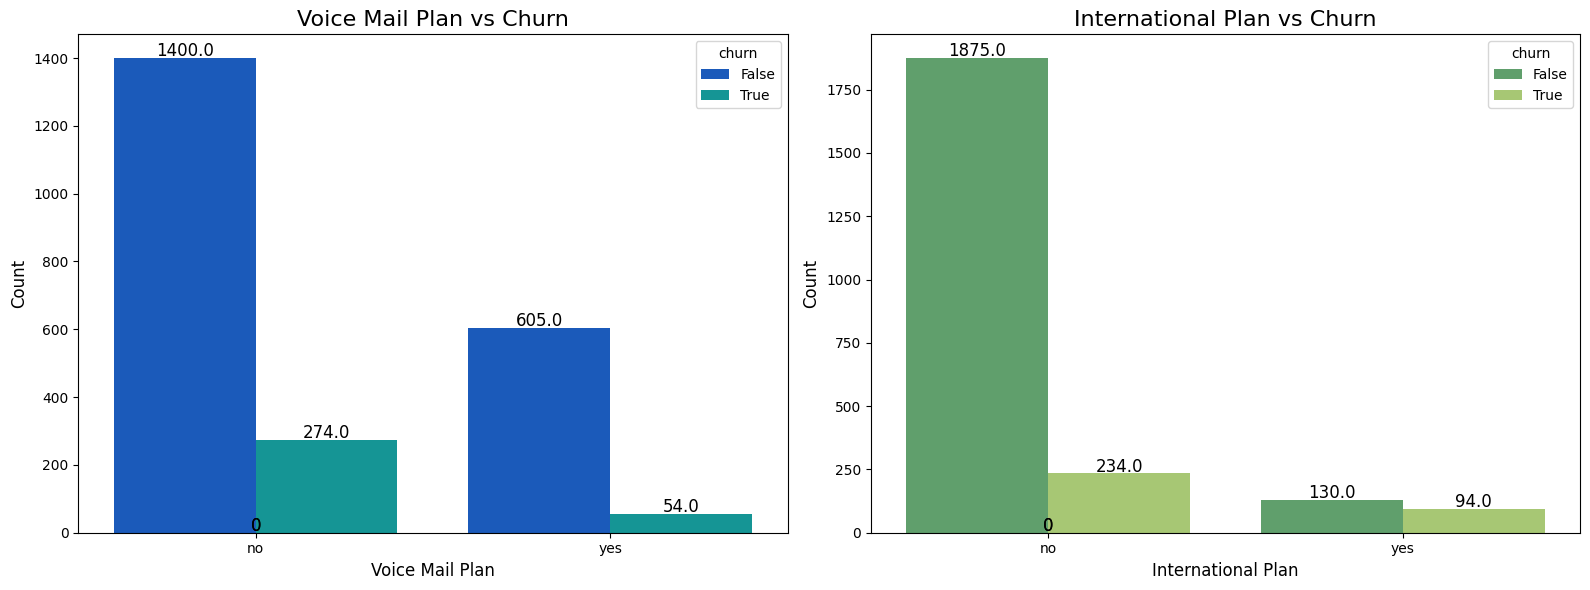

In [14]:
# Voice mail plan vs churn
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='voice mail plan', hue='churn', data=train_df, palette="winter", ax=ax[0])
ax[0].set_title('Voice Mail Plan vs Churn', fontsize=16)
ax[0].set_xlabel('Voice Mail Plan', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Add count labels on bars
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   fontsize=12, color='black', 
                   xytext=(0, 5), textcoords='offset points')

# International plan vs churn
sns.countplot(x='international plan', hue='churn', data=train_df, palette="summer", ax=ax[1])
ax[1].set_title('International Plan vs Churn', fontsize=16)
ax[1].set_xlabel('International Plan', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

# Add count labels on bars
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   fontsize=12, color='black', 
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

 4. What role do total charges (day, a, night) play in customer churn?

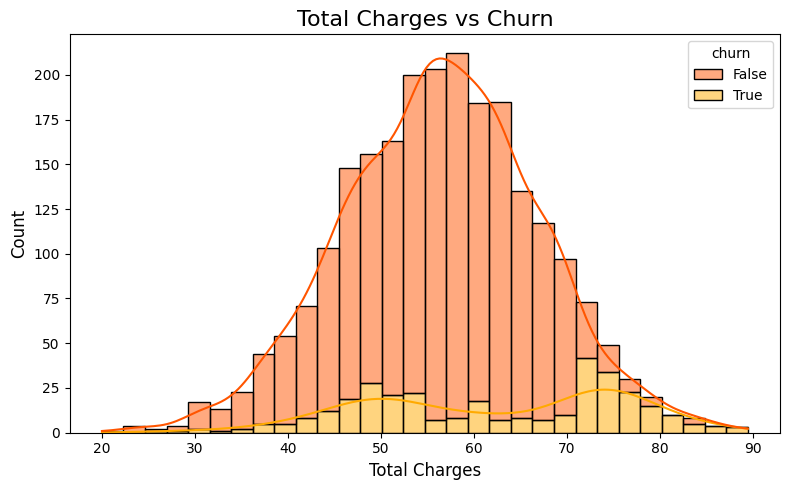

In [15]:
x_train_df = train_df.copy()
x_train_df['total charge'] = train_df['total day charge'] + train_df['total eve charge'] + train_df['total night charge']

# Plot for Total Charges vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=x_train_df, x='total charge', hue='churn', multiple='stack', kde=True, palette='autumn', bins=30)
plt.title('Total Charges vs Churn', fontsize=16)
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


5. Does the account length have a relationship with churn probability?

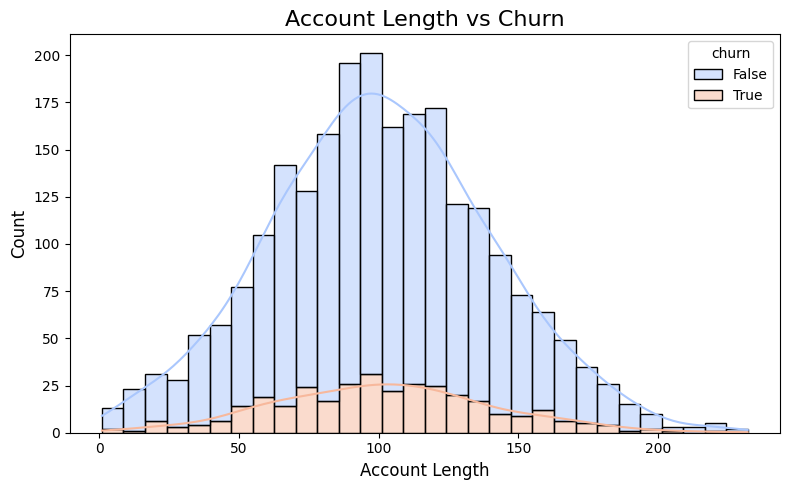

In [16]:
# Plot for Account Length vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='account length', hue='churn', multiple='stack', kde=True, palette='coolwarm', bins=30)
plt.title('Account Length vs Churn', fontsize=16)
plt.xlabel('Account Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Outlier Deteection


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_visualize_outliers(df, cat_threshold=0, visualize=True):
    """
    Function to detect outliers in both numerical and categorical columns, visualize them,
    and return the outliers for each column.
    
    Parameters:
    df (DataFrame): The input dataframe containing both numerical and categorical columns.
    cat_threshold (int): The threshold for detecting rare categories (outliers) in categorical columns.
                         Categories with a frequency less than this threshold will be considered outliers.
    visualize (bool): If True, the function will plot boxplots for numerical columns and barplots for categorical columns.
    
    Returns:
    dict: A dictionary containing the outliers for each column.
    """
    
    outliers_dict = {}

    # Detect outliers in numerical columns using IQR method
    def detect_numerical_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column < lower_bound) | (column > upper_bound)]
    
    # Detect outliers in categorical columns based on frequency threshold
    def detect_categorical_outliers(column):
        freq = column.value_counts()
        return column[column.isin(freq[freq < cat_threshold].index)]
    
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Plot outliers for numerical columns using boxplot
    for col in numerical_columns:
        outliers = detect_numerical_outliers(df[col])
        outliers_dict[col] = outliers  # Store the detected outliers

        # Visualization
        if visualize:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[col],palette="summer")
            plt.title(f'Numerical Column: {col} - Outliers')
            plt.show()
        
        if not outliers.empty:
            print(f'Outliers detected in {col}:')
            print(outliers)
        else:
            print(f'No outliers detected in {col}')
    
    # Plot outliers for categorical columns using barplot
    for col in categorical_columns:
        outliers = detect_categorical_outliers(df[col])
        outliers_dict[col] = outliers  # Store the detected outliers

        if visualize and not outliers.empty:
            plt.figure(figsize=(10, 5))
            outlier_counts = outliers.value_counts()
            sns.barplot(x=outlier_counts.index, y=outlier_counts.values)
            plt.title(f'Categorical Column: {col} - Outliers')
            plt.ylabel('Frequency')
            plt.show()
            
            print(f'Outliers detected in {col}:')
            print(outliers.unique())
        elif not visualize:
            print(f'Outliers detected in {col}:')
            print(outliers.unique())
        else:
            print(f'No outliers detected in {col}')
    
    return outliers_dict


Train data




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



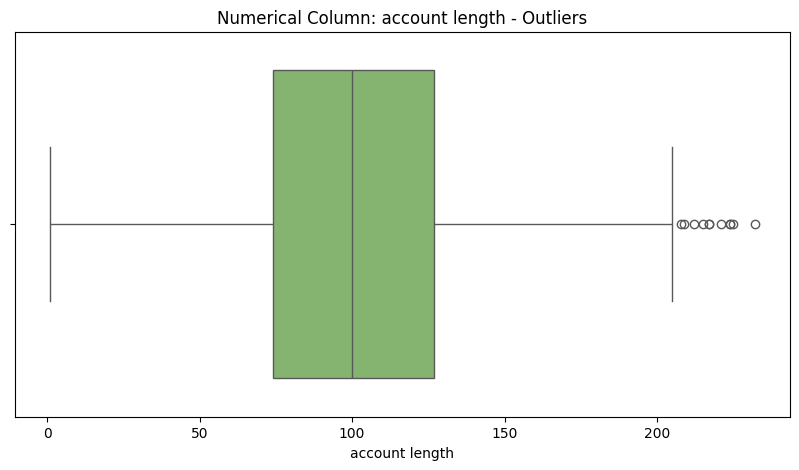

Outliers detected in account length:
1387    212
3216    221
1408    232
1886    224
416     224
197     208
1751    225
3227    209
1045    217
238     215
2277    217
Name: account length, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



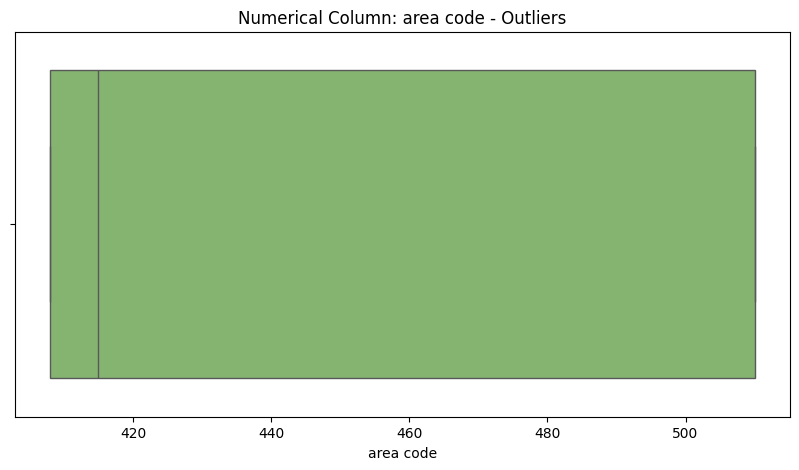

No outliers detected in area code




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



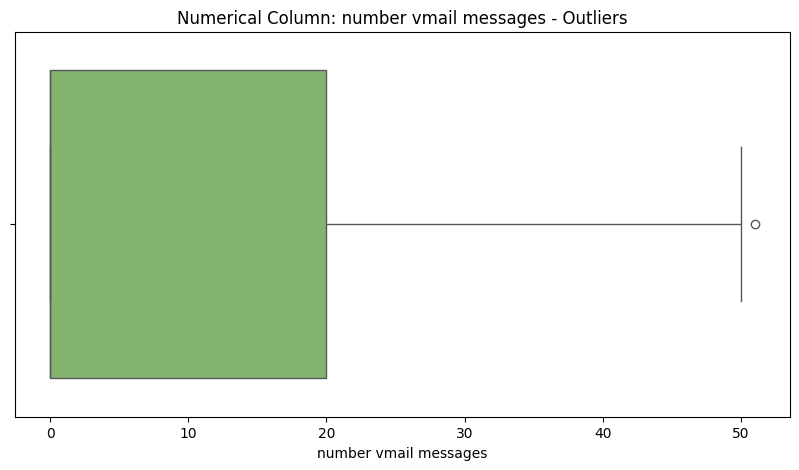

Outliers detected in number vmail messages:
845    51
Name: number vmail messages, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



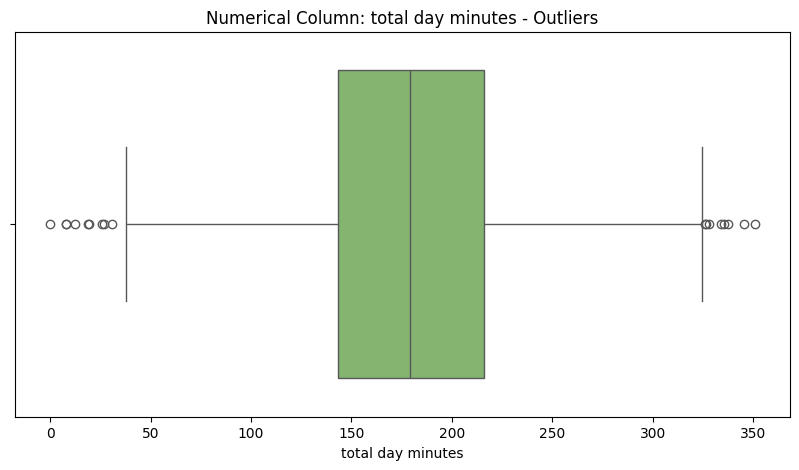

Outliers detected in total day minutes:
1397      0.0
2124     27.0
2594    345.3
1076     25.9
2753      7.8
2412    326.3
3046     18.9
2028    328.1
685      30.9
605     335.5
197     326.5
1986      7.9
1052     12.5
975     334.3
156     337.4
365     350.8
1621     19.5
Name: total day minutes, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



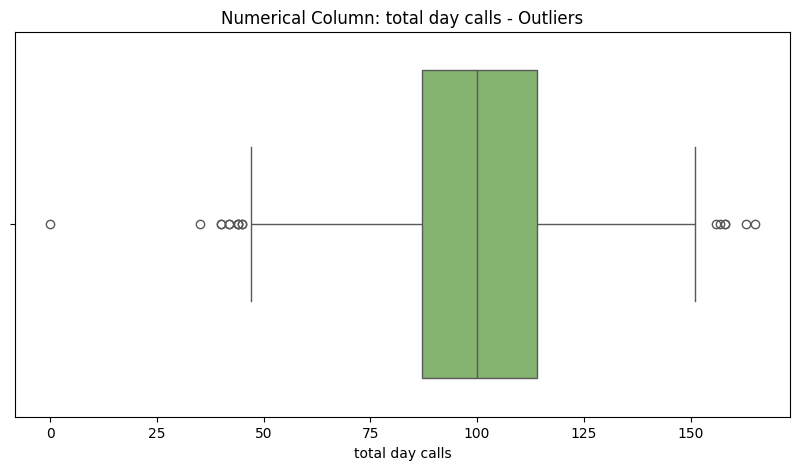

Outliers detected in total day calls:
1397      0
1422     45
740      40
3187     40
2885     44
1869    156
1322     42
315     158
2217     42
2492     45
2964     44
468     163
1057    158
1121    165
2884     44
1989     35
2394    157
Name: total day calls, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



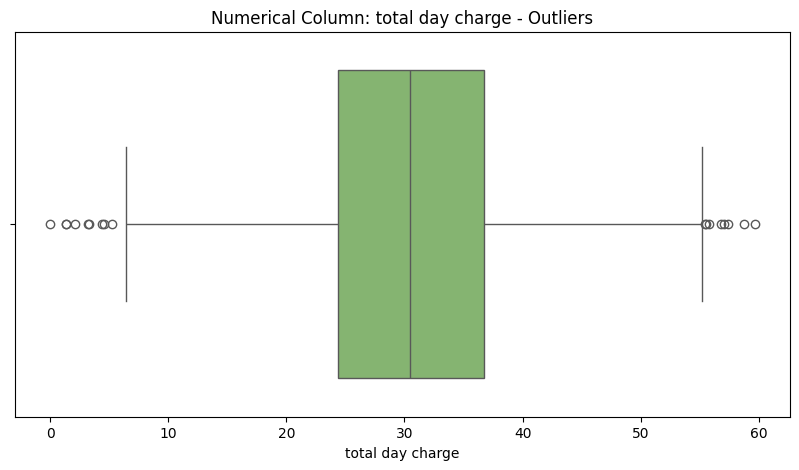

Outliers detected in total day charge:
1397     0.00
2124     4.59
2594    58.70
1076     4.40
2753     1.33
2412    55.47
3046     3.21
2028    55.78
685      5.25
605     57.04
197     55.51
1986     1.34
1052     2.13
975     56.83
156     57.36
365     59.64
1621     3.32
Name: total day charge, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



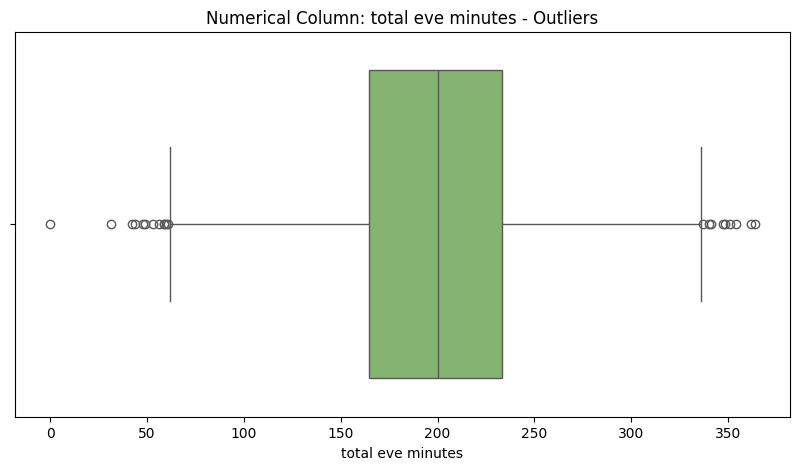

Outliers detected in total eve minutes:
2551    354.2
889      42.5
3075    341.3
32       31.2
1190     56.0
6       348.5
893      60.8
850      52.9
1054     58.6
580     347.3
2331    361.8
821      43.9
529     337.1
2160    339.9
587      58.9
1335     60.0
2732    363.7
1960     49.2
1601    350.9
1233     48.1
2932      0.0
Name: total eve minutes, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



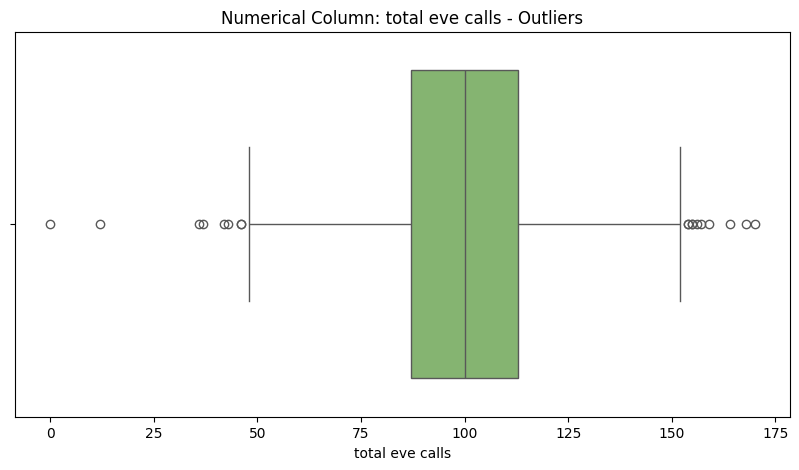

Outliers detected in total eve calls:
3219    170
2063    154
2227    155
1706    156
58      164
3157    159
1615     36
1071    155
301     168
646      37
475      42
960      12
2853     43
2592     46
2937    154
154      46
1020    157
2932      0
Name: total eve calls, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



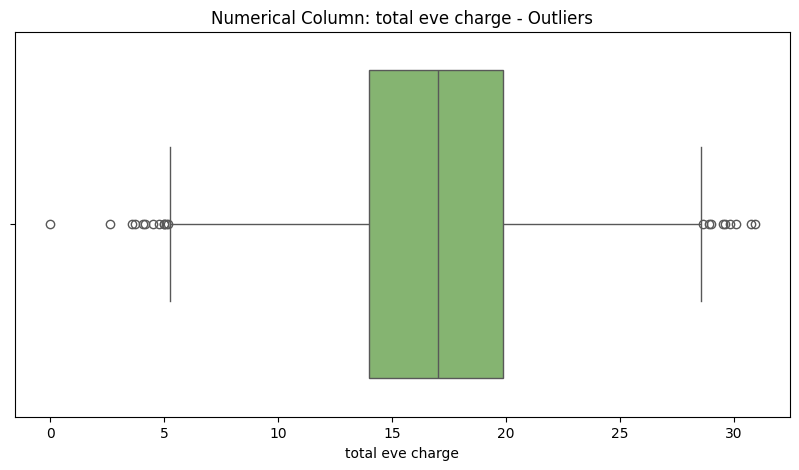

Outliers detected in total eve charge:
2551    30.11
889      3.61
3075    29.01
32       2.65
1190     4.76
6       29.62
893      5.17
850      4.50
1054     4.98
580     29.52
2331    30.75
821      3.73
529     28.65
2160    28.89
587      5.01
1335     5.10
2732    30.91
1960     4.18
1601    29.83
1233     4.09
2932     0.00
Name: total eve charge, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



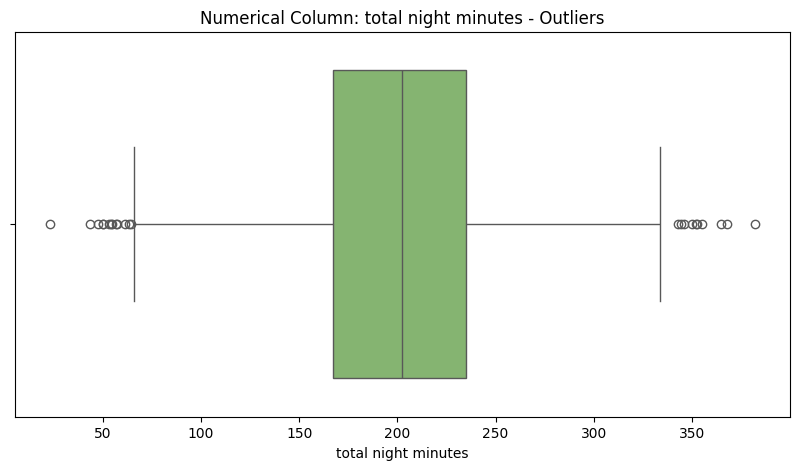



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Outliers detected in total night minutes:
3159     61.4
1313     63.6
2321    367.7
2350     56.6
918     342.8
2754    350.2
1317    381.9
1072     50.1
1238    352.5
2609    344.3
3247     47.4
3060    352.2
999      54.5
3107    364.9
116      57.5
2452     64.2
244     354.9
1260     23.2
862     345.8
1113     43.7
2756     50.1
3024     53.3
2382     54.0
Name: total night minutes, dtype: float64


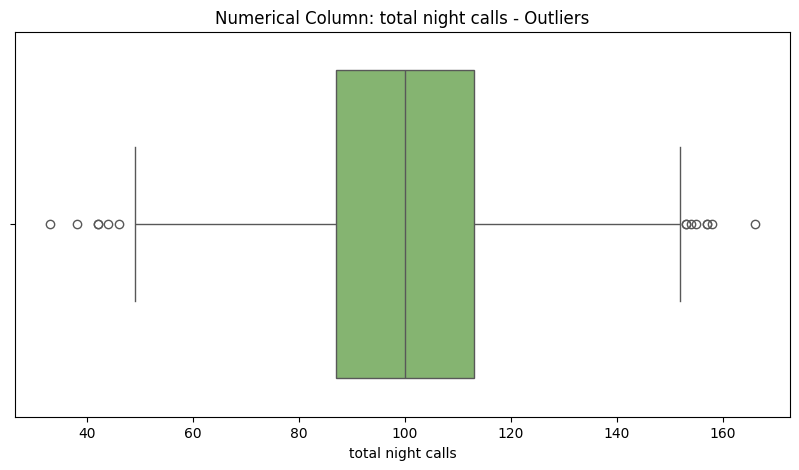



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Outliers detected in total night calls:
2903     38
429     153
901     158
1109    155
3234    153
1200    157
326      42
2659     33
1748    154
315      46
1296    157
335      44
395      42
2288    166
Name: total night calls, dtype: int64


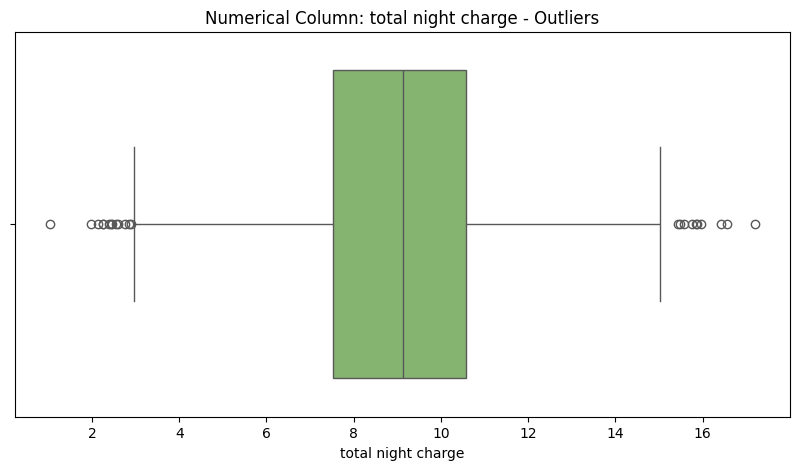



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Outliers detected in total night charge:
3159     2.76
1313     2.86
2321    16.55
2350     2.55
918     15.43
2754    15.76
1317    17.19
1072     2.25
1238    15.86
2609    15.49
3247     2.13
3060    15.85
999      2.45
3107    16.42
116      2.59
2452     2.89
244     15.97
1260     1.04
862     15.56
1113     1.97
2756     2.25
3024     2.40
2382     2.43
Name: total night charge, dtype: float64


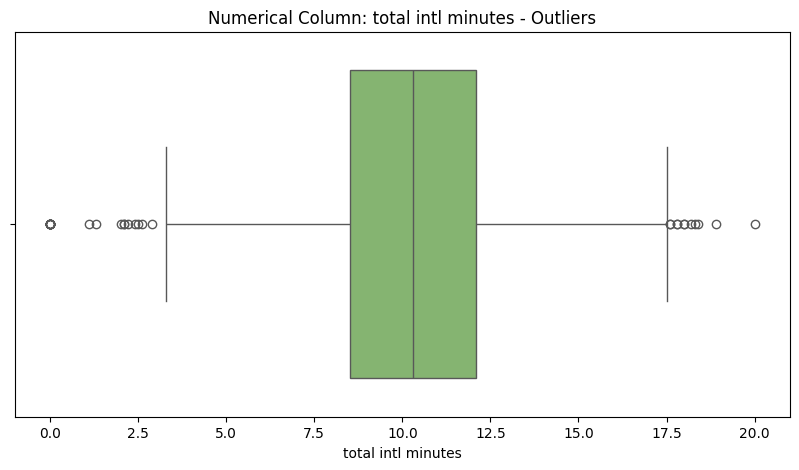

Outliers detected in total intl minutes:
2513     0.0
3216     2.4
1099     2.2
712      0.0
2256     2.6
1257    18.0
3234     2.5
2362     0.0
3022     2.9
1400     0.0
2669     1.1
1816    18.4
314     18.9
3275     0.0
2733     0.0
115     20.0
1966     2.0
3307    17.8
762      1.3
214     17.6
2933     2.1
179      0.0
2816    18.3
1080     0.0
343      0.0
3160     2.1
2229    17.6
2004    17.8
2371    18.2
595      0.0
2345     0.0
1028     0.0
2534    18.0
2918     0.0
Name: total intl minutes, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



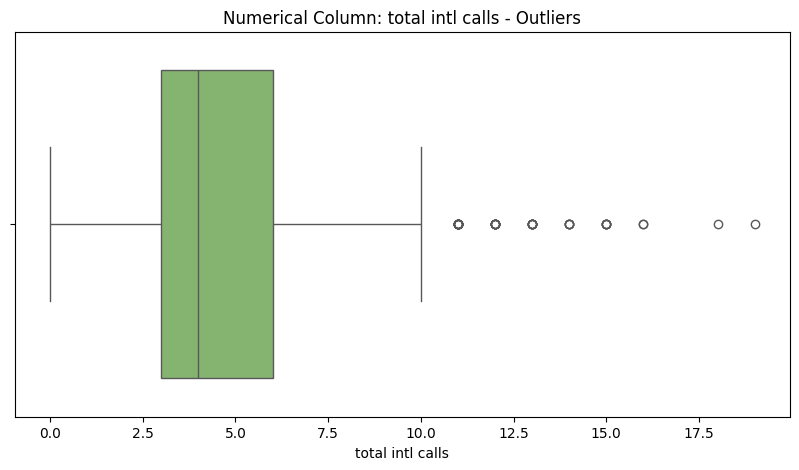

Outliers detected in total intl calls:
957     15
1092    13
1021    12
2956    18
723     11
474     12
22      19
2970    12
1333    12
1657    11
2826    11
3071    12
347     11
250     11
341     11
329     12
1832    11
588     11
514     12
2883    11
1323    11
756     14
272     13
3097    11
1179    14
41      15
2156    11
674     15
2835    15
2001    14
3230    14
1392    15
3128    11
1567    16
854     13
642     13
185     13
837     13
2621    16
1419    12
2724    11
1960    11
2775    13
2930    12
2018    11
2562    11
Name: total intl calls, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



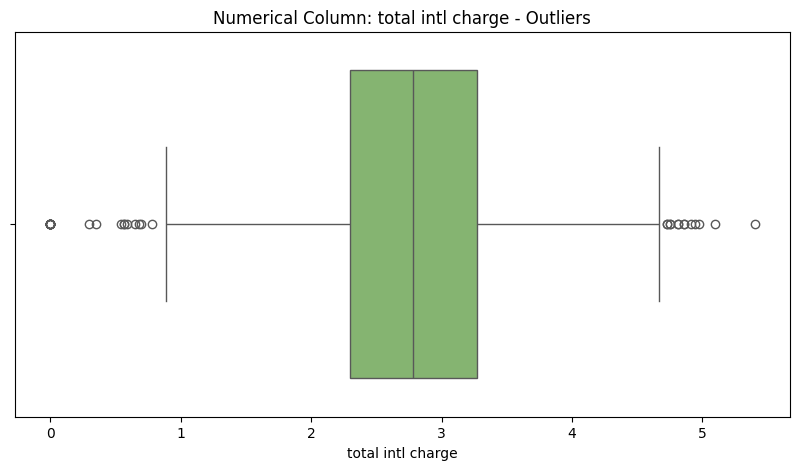

Outliers detected in total intl charge:
2513    0.00
3216    0.65
1099    0.59
712     0.00
2256    0.70
1257    4.86
3234    0.68
2362    0.00
3022    0.78
1400    0.00
2669    0.30
1816    4.97
314     5.10
515     4.73
3275    0.00
2733    0.00
115     5.40
1966    0.54
3307    4.81
762     0.35
214     4.75
2933    0.57
179     0.00
2816    4.94
1080    0.00
343     0.00
3160    0.57
2229    4.75
2004    4.81
2371    4.91
595     0.00
2345    0.00
1028    0.00
3080    4.73
2534    4.86
2918    0.00
Name: total intl charge, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



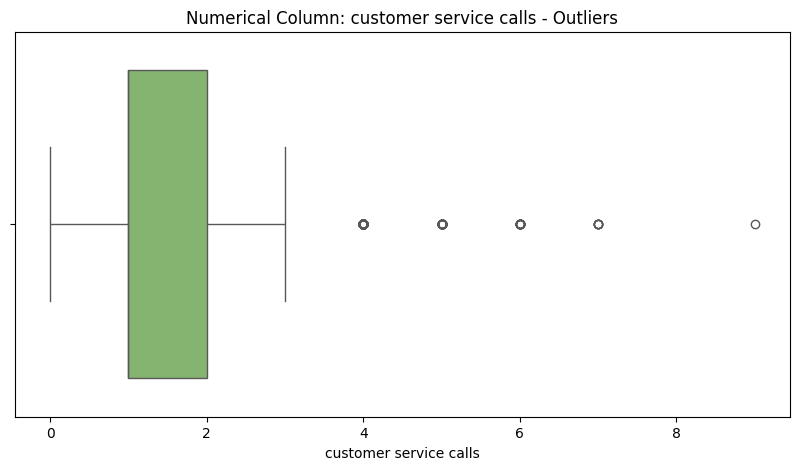

Outliers detected in customer service calls:
3323    5
14      4
1699    4
1922    4
3280    4
       ..
1273    6
1802    5
126     4
307     4
1044    4
Name: customer service calls, Length: 179, dtype: int64
No outliers detected in state
No outliers detected in phone number
No outliers detected in international plan
No outliers detected in voice mail plan


In [18]:
print("===="*40)
print("Train data")
print("===="*40)
outliers = detect_and_visualize_outliers(train_df, cat_threshold=0)

In [19]:
def filter_outliers(df, column_name, threshold, condition):
    if column_name in df.columns:
        if condition == 'below':
            outliers = df[df[column_name] < threshold]
            df_filtered = df[df[column_name] >= threshold]
        elif condition == 'above':
            outliers = df[df[column_name] > threshold]
            df_filtered = df[df[column_name] <= threshold]
        else:
            raise ValueError("Condition must be 'below' or 'above'")
        
        count = len(outliers)
        return df_filtered, count
    else:
        print(f"'{column_name}' column not found in DataFrame")
        return df, 0


In [20]:
# train_df, removed_count_above = filter_outliers(train_df, 'cutomer service calls', 8, condition='above')
# removed_count_above

## 2. Feature Engineering and Selection

In [21]:
# outliers

In [22]:
# # Remove outliers from data
# for col, outlier_values in outliers.items():
#     train_df = train_df[~train_df[col].isin(outlier_values)]

In [ ]:
# Create the new columns for total charge, total usage, and total calls
train_df['total charge'] = train_df['total day charge'] + train_df['total eve charge'] + train_df['total night charge'] + train_df['total intl charge']
train_df['total_usage'] = train_df['total day minutes'] + train_df['total eve minutes'] + train_df['total night minutes'] + train_df['total intl minutes']
train_df['total_calls'] = train_df['total day calls'] + train_df['total eve calls'] + train_df['total night calls'] + train_df['total intl calls']

# Drop the individual charge columns
train_df = train_df.drop(["total day charge", "total eve charge", "total night charge", "total intl charge"], axis=1)

# Drop the individual minutes columns
train_df = train_df.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1)

# Drop the individual calls columns since 'total_calls' is now created
train_df = train_df.drop(["total day calls", "total eve calls", "total night calls", "total intl calls"], axis=1)

# Drop the 'state' and 'phone number' column
train_df = train_df.drop(["phone number","state"], axis=1)


In [24]:
# Create the new columns for total charge, total usage, and total calls
test_df['total charge'] = test_df['total day charge'] + test_df['total eve charge'] + test_df['total night charge'] + test_df['total intl charge']
test_df['total_usage'] = test_df['total day minutes'] + test_df['total eve minutes'] + test_df['total night minutes'] + test_df['total intl minutes']
test_df['total_calls'] = test_df['total day calls'] + test_df['total eve calls'] + test_df['total night calls'] + test_df['total intl calls']

# Drop the individual charge columns
test_df = test_df.drop(["total day charge", "total eve charge", "total night charge", "total intl charge"], axis=1)

# Drop the individual minutes columns
test_df = test_df.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1)

# Drop the individual calls columns since 'total_calls' is now created
test_df = test_df.drop(["total day calls", "total eve calls", "total night calls", "total intl calls"], axis=1)

# Drop the 'state' column
test_df = test_df.drop(["phone number","state"], axis=1)


In [25]:
X = train_df.drop(columns=["churn"])

test_X = test_df.drop(columns=["churn"])


y = train_df["churn"]

test_y = test_df["churn"]

In [26]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y = label_encoder.fit_transform(y)

test_y = label_encoder.fit_transform(test_y)


In [27]:

def encode_categorical_features(X_train, X_test):
    """
    Encodes categorical features using Label Encoding 
    
    Args:
    - X_train (pd.DataFrame): Training data.
    - X_test (pd.DataFrame): Test data.
    
    Returns:
    - X_train_encoded (pd.DataFrame): Encoded training data.
    - X_test_encoded (pd.DataFrame): Encoded test data.
    """
    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Find categorical columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
    
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    for col in categorical_cols:
        # Fit and transform the training data, transform the test data
        X_train_encoded[col] = le.fit_transform(X_train[col])
        X_test_encoded[col] = le.transform(X_test[col])  # Use the same transformation on test data
        
    return X_train_encoded, X_test_encoded


In [28]:
train, test = encode_categorical_features(X,test_X)

## 3. Model Development and Evaluation

In [29]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [30]:
# Initialize top-performing and additional models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(verbose=-1),
    'Extra Trees': ExtraTreesClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Silence output for simplicity
}

best_hyperparameters = {
    'Logistic Regression': {
        'C': 6.922178705925688,
        'max_iter': 959
    },
    'Random Forest': {
        'n_estimators': 93,
        'max_depth': 14,
        'min_samples_split': 10,
        'min_samples_leaf': 6,
        'max_features': 'sqrt'
    },
    'Gradient Boosting': {
        'n_estimators': 231,
        'learning_rate': 0.0203832339574697,
        'max_depth': 6,
        'min_samples_split': 15,
        'min_samples_leaf': 16,
        'subsample': 0.35720726791726004
    },
    'AdaBoost': {
        'n_estimators': 74,
        'learning_rate': 0.12556313342883285
    },
    'Extra Trees': {
        'n_estimators': 486,
        'max_depth': 18,
        'min_samples_split': 8,
        'min_samples_leaf': 1,
    },
    'MLP Classifier': {
        'hidden_layer_sizes': 150,
        'activation': 'relu',
        'learning_rate_init': 0.029391006270638717,
        'max_iter': 156,
        'alpha': 0.00018785890172500156
    },
    'CatBoost': {
        'iterations': 486,
        'learning_rate': 0.11615555522402143,
        'depth': 5,
        'l2_leaf_reg': 5.784524137220625
    },
    'XGBoost': {
        'n_estimators': 402,
        'learning_rate': 0.13094662474301388,
        'max_depth': 3,
        'subsample': 0.5873697193614926,
        'colsample_bytree': 0.9605388838276429,
        'gamma': 2.470583823788126
    },
    'LightGBM': {
        'n_estimators': 54,
        'learning_rate': 0.2690272158104924,
        'max_depth': 3,
        'num_leaves': 35,
        'min_data_in_leaf': 83,
        'subsample': 0.9331799717752609,
        'colsample_bytree': 0.7742771742252627
    }
}

In [31]:


def evaluate_models_with_params(models, best_hyperparameters, X_train, y_train, cv=5):
    metrics = []  # List to store the metrics for comparison
    updated_models = {}  # To store models with updated hyperparameters
    
    # Update models with best hyperparameters
    for model_name, model in models.items():
        if model_name in best_hyperparameters:
            # Set the hyperparameters for the model
            model.set_params(**best_hyperparameters[model_name])
            updated_models[model_name] = model
        else:
            updated_models[model_name] = model
    
    for model_name, model in updated_models.items():
        print(f"Evaluating model: {model_name}")
        
        # Cross-validation predictions (for metrics like precision, recall, F1, ROC-AUC)
        y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
        y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')  # For ROC-AUC
        
        # Accuracy
        accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
        
        # Precision, Recall, F1-Score
        precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_pred, average='weighted')
        
        # ROC-AUC (use probabilities for this)
        if len(np.unique(y_train)) == 2:
            roc_auc = roc_auc_score(y_train, y_pred_prob[:, 1])
        else:
            roc_auc = roc_auc_score(y_train, y_pred_prob, multi_class='ovr', average='weighted')
        
        # Confusion Matrix
        cm = confusion_matrix(y_train, y_pred)
        
        # Add metrics and hyperparameters to the list
        metrics.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion Matrix': cm,
        })
        
        # Print confusion matrix as heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # Display metrics for each model
        print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    
    # Convert the metrics list to a DataFrame for easy comparison
    metrics_df = pd.DataFrame(metrics)
    return metrics_df



Evaluating model: Logistic Regression


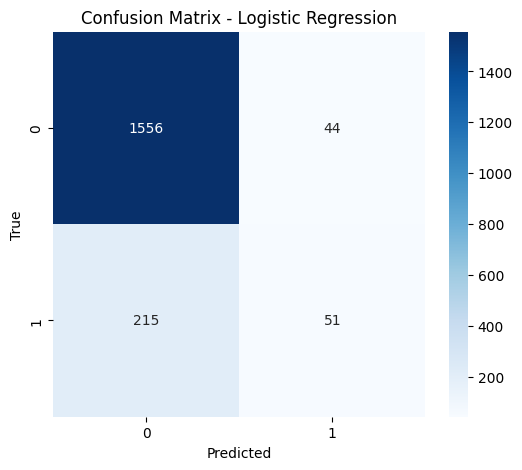

Logistic Regression - Accuracy: 0.8612, Precision: 0.8299, Recall: 0.8612, F1-Score: 0.8318, ROC-AUC: 0.8096
Evaluating model: Random Forest


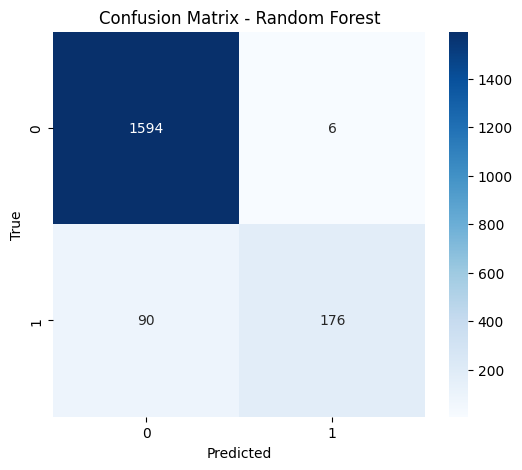

Random Forest - Accuracy: 0.9507, Precision: 0.9495, Recall: 0.9486, F1-Score: 0.9444, ROC-AUC: 0.9181
Evaluating model: Gradient Boosting


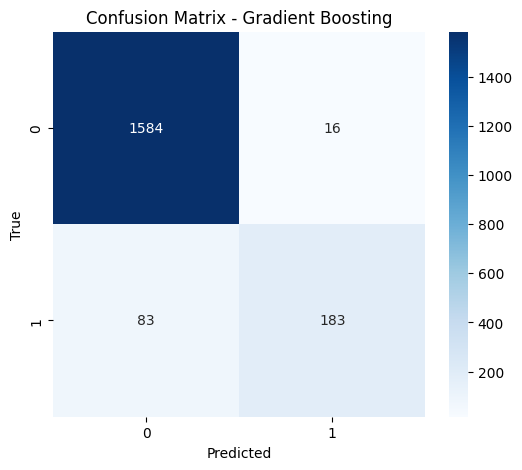

Gradient Boosting - Accuracy: 0.9469, Precision: 0.9458, Recall: 0.9469, F1-Score: 0.9437, ROC-AUC: 0.9261
Evaluating model: AdaBoost


The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMM

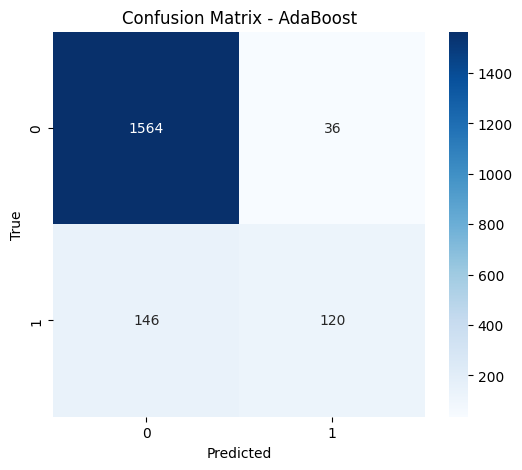

AdaBoost - Accuracy: 0.9025, Precision: 0.8939, Recall: 0.9025, F1-Score: 0.8914, ROC-AUC: 0.9050
Evaluating model: Decision Tree


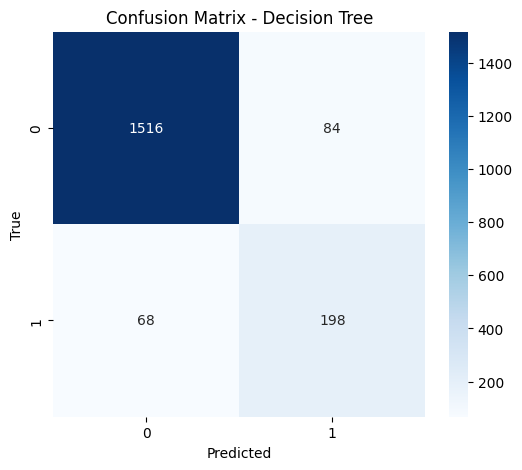

Decision Tree - Accuracy: 0.9164, Precision: 0.9207, Recall: 0.9185, F1-Score: 0.9195, ROC-AUC: 0.8375
Evaluating model: XGBoost


[23:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "u

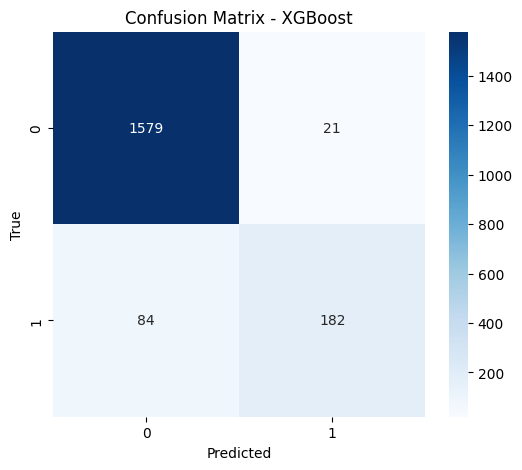

XGBoost - Accuracy: 0.9437, Precision: 0.9419, Recall: 0.9437, F1-Score: 0.9405, ROC-AUC: 0.9209
Evaluating model: LightGBM


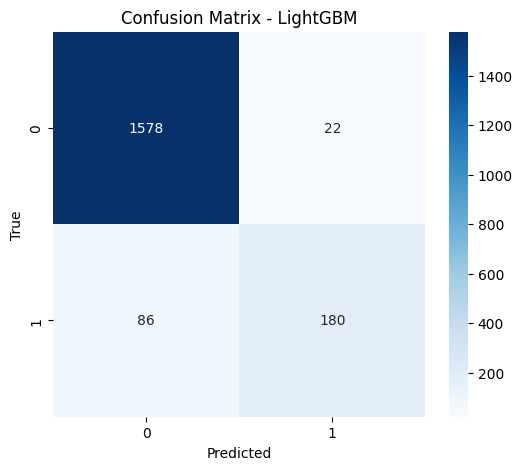

LightGBM - Accuracy: 0.9421, Precision: 0.9402, Recall: 0.9421, F1-Score: 0.9387, ROC-AUC: 0.9196
Evaluating model: Extra Trees


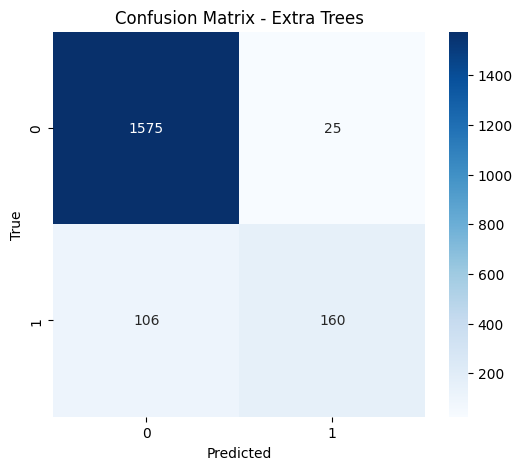

Extra Trees - Accuracy: 0.9303, Precision: 0.9267, Recall: 0.9298, F1-Score: 0.9244, ROC-AUC: 0.9149
Evaluating model: CatBoost


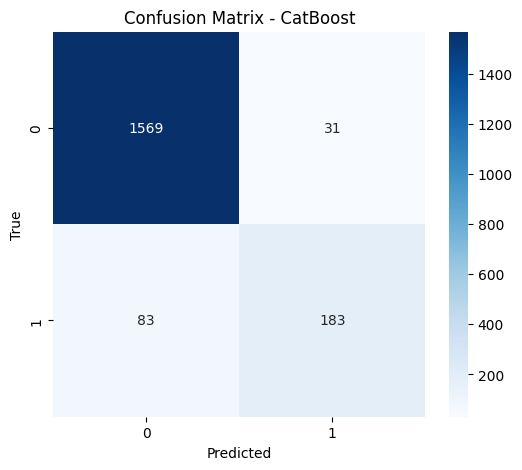

CatBoost - Accuracy: 0.9389, Precision: 0.9363, Recall: 0.9389, F1-Score: 0.9361, ROC-AUC: 0.9145

Model Comparison Based on Metrics:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Logistic Regression,0.861199,0.829882,0.861200,0.831847,0.809570,"[[1556, 44], [215, 51]]"
1,Random Forest,0.950690,0.949475,0.948553,0.944388,0.918062,"[[1594, 6], [90, 176]]"
2,Gradient Boosting,0.946940,0.945846,0.946945,0.943667,0.926142,"[[1584, 16], [83, 183]]"
3,AdaBoost,0.902456,0.893895,0.902465,0.891374,0.904968,"[[1564, 36], [146, 120]]"
4,Decision Tree,0.916390,0.920728,0.918542,0.919527,0.837474,"[[1516, 84], [68, 198]]"
5,XGBoost,0.943720,0.941943,0.943730,0.940494,0.920949,"[[1579, 21], [84, 182]]"
6,LightGBM,0.942113,0.940159,0.942122,0.938732,0.919619,"[[1578, 22], [86, 180]]"
7,Extra Trees,0.930315,0.926668,0.929796,0.924359,0.914861,"[[1575, 25], [106, 160]]"
8,CatBoost,0.938900,0.936270,0.938907,0.936086,0.914483,"[[1569, 31], [83, 183]]"


In [32]:
# Assuming you have your training features (X_train) and target labels (y_train)
model_comparison_df = evaluate_models_with_params(models,best_hyperparameters, X_train, y_train)

# Display the comparison table
print("\nModel Comparison Based on Metrics:")
model_comparison_df

Evaluating model: Logistic Regression


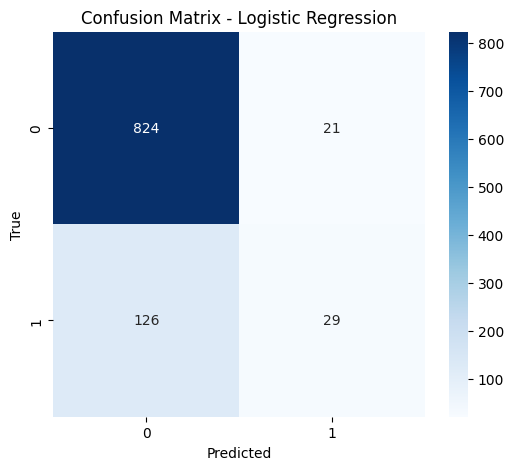

Logistic Regression - Accuracy: 0.8530, Precision: 0.8228, Recall: 0.8530, F1-Score: 0.8197, ROC-AUC: 0.7933
Evaluating model: Random Forest


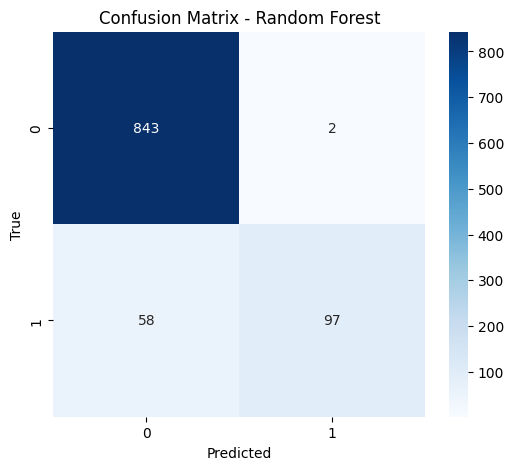

Random Forest - Accuracy: 0.9360, Precision: 0.9425, Recall: 0.9400, F1-Score: 0.9343, ROC-AUC: 0.9030
Evaluating model: Gradient Boosting


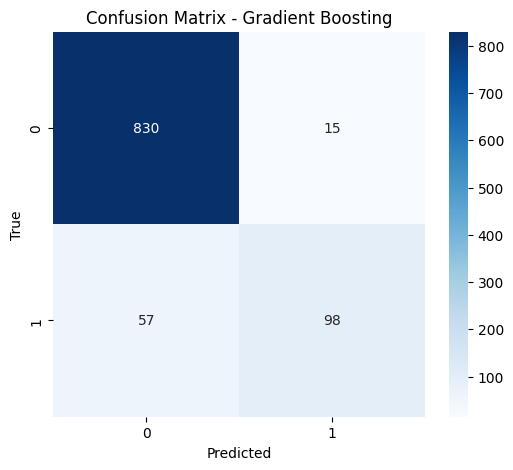

Gradient Boosting - Accuracy: 0.9290, Precision: 0.9251, Recall: 0.9280, F1-Score: 0.9232, ROC-AUC: 0.9012
Evaluating model: AdaBoost


The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMM

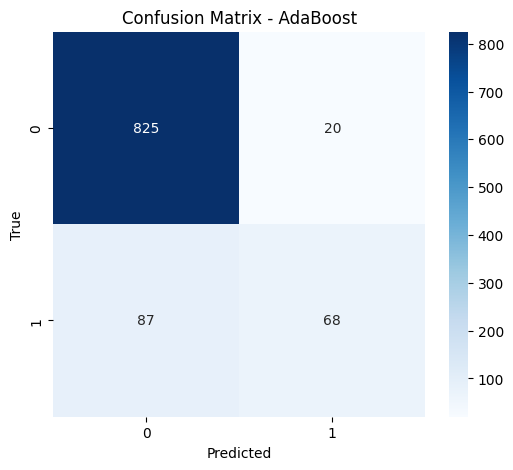

AdaBoost - Accuracy: 0.8930, Precision: 0.8842, Recall: 0.8930, F1-Score: 0.8803, ROC-AUC: 0.8449
Evaluating model: Decision Tree


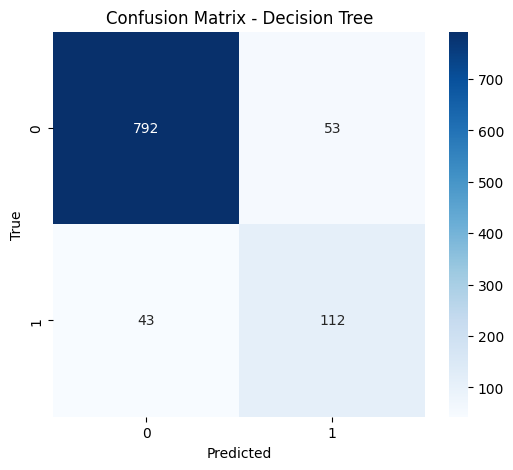

Decision Tree - Accuracy: 0.8990, Precision: 0.9067, Recall: 0.9040, F1-Score: 0.9052, ROC-AUC: 0.8229
Evaluating model: XGBoost


[23:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "u

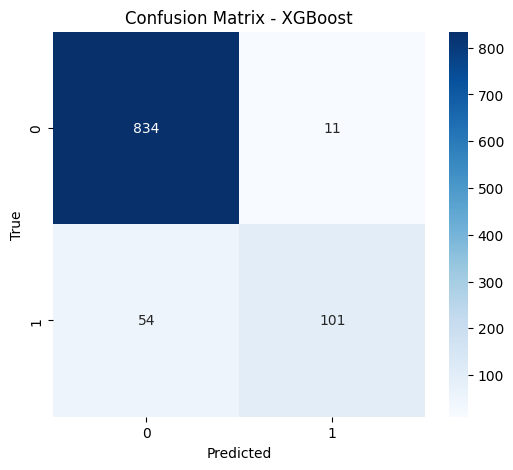

XGBoost - Accuracy: 0.9350, Precision: 0.9334, Recall: 0.9350, F1-Score: 0.9306, ROC-AUC: 0.9062
Evaluating model: LightGBM


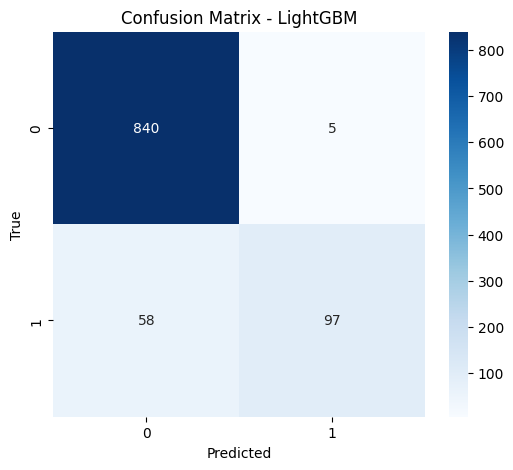

LightGBM - Accuracy: 0.9370, Precision: 0.9378, Recall: 0.9370, F1-Score: 0.9315, ROC-AUC: 0.8292
Evaluating model: Extra Trees


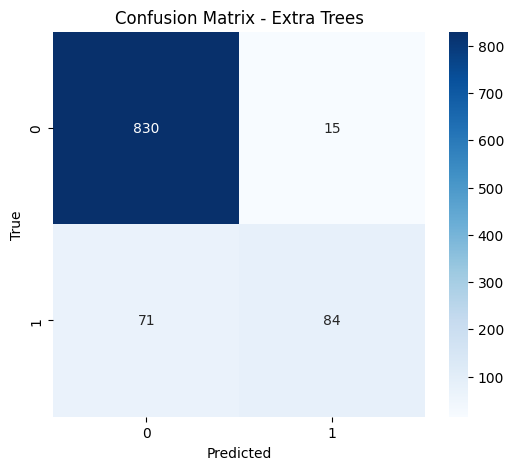

Extra Trees - Accuracy: 0.9140, Precision: 0.9099, Recall: 0.9140, F1-Score: 0.9059, ROC-AUC: 0.8961
Evaluating model: CatBoost


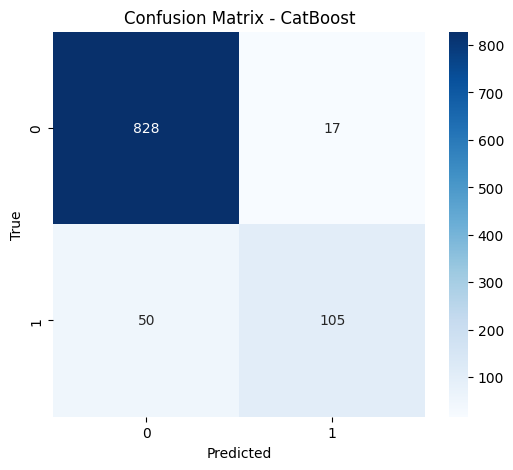

CatBoost - Accuracy: 0.9330, Precision: 0.9303, Recall: 0.9330, F1-Score: 0.9297, ROC-AUC: 0.8866

Model Comparison Based on Metrics:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Logistic Regression,0.853,0.822826,0.853,0.819653,0.793274,"[[824, 21], [126, 29]]"
1,Random Forest,0.936,0.942474,0.940,0.934348,0.902989,"[[843, 2], [58, 97]]"
2,Gradient Boosting,0.929,0.925124,0.928,0.923231,0.901203,"[[830, 15], [57, 98]]"
3,AdaBoost,0.893,0.884164,0.893,0.880289,0.844890,"[[825, 20], [87, 68]]"
4,Decision Tree,0.899,0.906697,0.904,0.905214,0.822886,"[[792, 53], [43, 112]]"
5,XGBoost,0.935,0.933392,0.935,0.930572,0.906181,"[[834, 11], [54, 101]]"
6,LightGBM,0.937,0.937825,0.937,0.931462,0.829212,"[[840, 5], [58, 97]]"
7,Extra Trees,0.914,0.909928,0.914,0.905899,0.896095,"[[830, 15], [71, 84]]"
8,CatBoost,0.933,0.930281,0.933,0.929651,0.886620,"[[828, 17], [50, 105]]"


In [33]:
# Assuming you have your training features (X_train) and target labels (y_train)
model_comparison_df = evaluate_models_with_params(models,best_hyperparameters, test, test_y)

# Display the comparison table
print("\nModel Comparison Based on Metrics:")
model_comparison_df

In [34]:
random_forest_model = RandomForestClassifier(
   **best_hyperparameters['Random Forest']                
)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=93)

## 4. Model Interpretation and Explainability

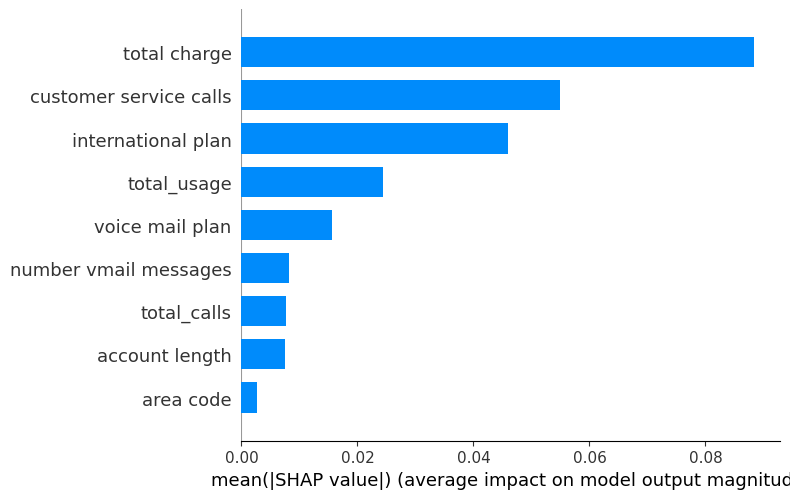

In [35]:
import shap

# Create a SHAP explainer for the random forest model
explainer = shap.TreeExplainer(random_forest_model)

# Compute SHAP values for the training set (or a subset)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot (which shows feature importance and distribution of SHAP values)
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

# SHAP force plot for individual prediction (optional)
shap.initjs()

# Pass the expected value as the first argument
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0])


## 5. Unsupervised model


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md



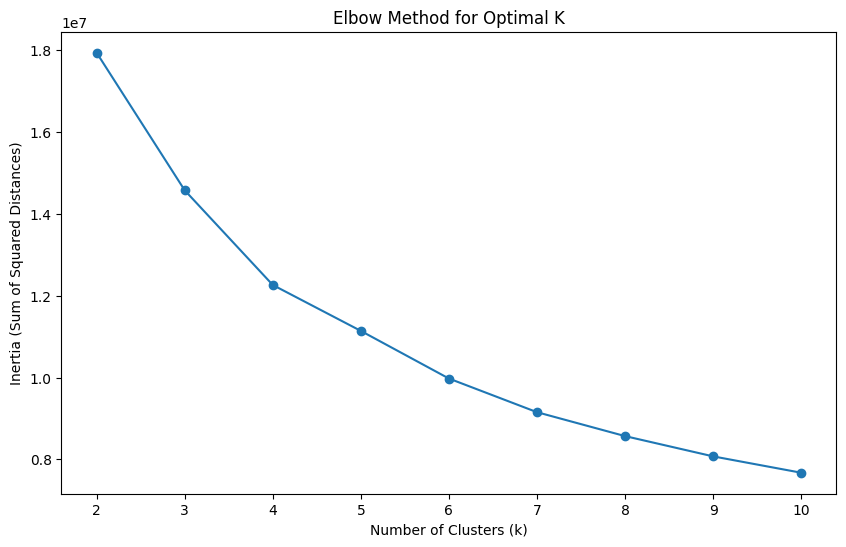

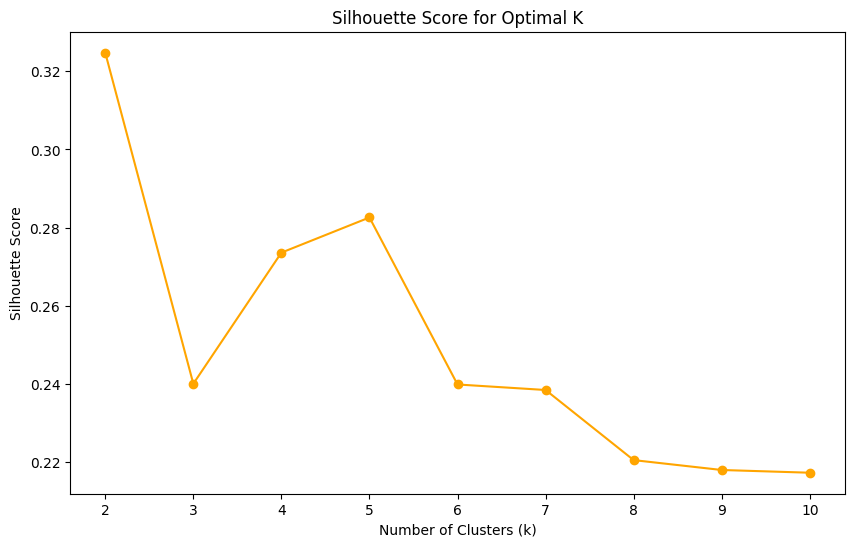

Optimal number of clusters based on Silhouette Score: 2


In [36]:
# Define the range of k (number of clusters) to evaluate
k_range = range(2, 11)  # Example: testing clusters from 2 to 10

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Loop through the k_range to compute inertia and silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train)  # Exclude target column if it exists
    inertia.append(kmeans.inertia_)
    
    # Compute silhouette score, exclude if there is only one cluster
    if k > 1:
        silhouette_scores.append(silhouette_score(train, kmeans.labels_))
    else:
        silhouette_scores.append(-1)  # Silhouette score is undefined for k=1

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Plot the Silhouette Score for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on these plots
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k}')


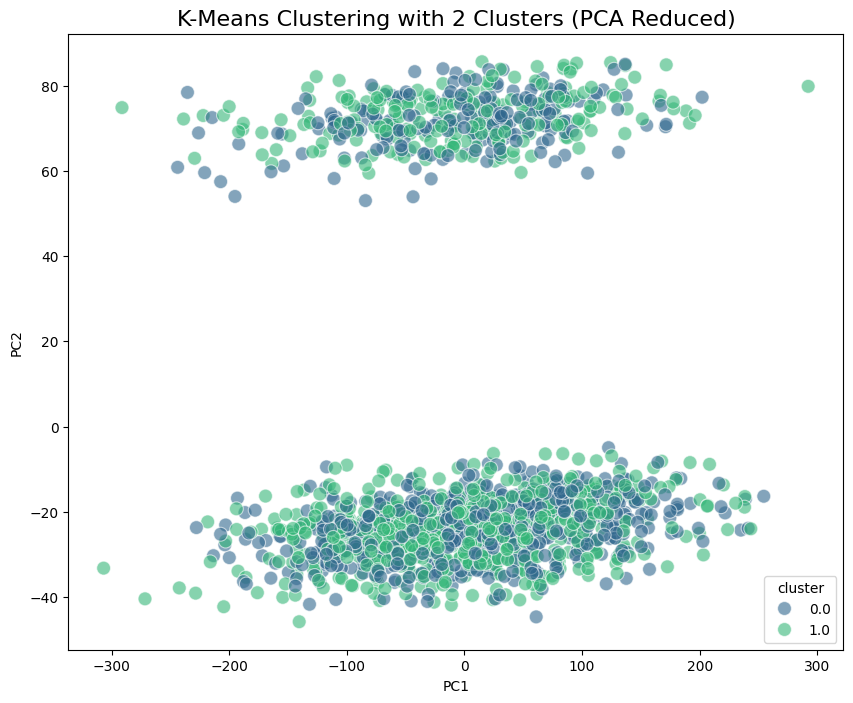

,account length,area code,international plan,voice mail plan,number vmail messages,customer service calls,total charge,total_usage,total_calls
cluster,,,,,,,,,
0,101.222123,437.037467,0.093666,0.287244,8.280999,1.551293,51.519144,515.246476,304.469224
1,100.146865,437.098185,0.098185,0.278053,8.276403,1.510726,66.379546,659.111716,304.136964


In [39]:
# Apply K-Means with the optimal number of clusters (based on silhouette score)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train['cluster'] = kmeans.fit_predict(train)  # Exclude target column if exists

# Optional: Use PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(train)  # Exclude target column if exists

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = train['cluster']

# Plot the clusters using seaborn scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title(f'K-Means Clustering with {optimal_k} Clusters (PCA Reduced)', fontsize=16)
plt.show()

# Additional: Analyze the clusters' characteristics by grouping the original data by cluster labels
cluster_analysis = train.groupby('cluster').mean()  # Get mean values for each cluster
cluster_analysis

## 6. Deployment Strategy and Monitoring

In [48]:
import joblib
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

used streamlit for deployment

## Hyperparameter Tuning

In [210]:
# import warnings
# import numpy as np
# import optuna
# from sklearn.ensemble import (
#     RandomForestClassifier,
#     GradientBoostingClassifier,
#     AdaBoostClassifier,
#     ExtraTreesClassifier,
# )
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# # Define models and parameter search spaces
# model_configs = {
#     'Logistic Regression': {
#         'model': LogisticRegression,
#         'params': {
#             'C': lambda trial: trial.suggest_float('C', 1e-5, 100.0, log=True),
#             'max_iter': lambda trial: trial.suggest_int('max_iter', 50, 1000),
#         }
#     },
#     'Random Forest': {
#         'model': RandomForestClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'max_depth': lambda trial: trial.suggest_int('max_depth', 1, 20),
#             'min_samples_split': lambda trial: trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': lambda trial: trial.suggest_int('min_samples_leaf', 1, 20),
#             'max_features': lambda trial: trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
#         }
#     },
#     'Gradient Boosting': {
#         'model': GradientBoostingClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'learning_rate': lambda trial: trial.suggest_float('learning_rate', 0.01, 0.3),
#             'max_depth': lambda trial: trial.suggest_int('max_depth', 1, 10),
#             'min_samples_split': lambda trial: trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': lambda trial: trial.suggest_int('min_samples_leaf', 1, 20),
#             'subsample': lambda trial: trial.suggest_float('subsample', 0.1, 1.0),
#         }
#     },
#     'AdaBoost': {
#         'model': AdaBoostClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'learning_rate': lambda trial: trial.suggest_float('learning_rate', 0.01, 2.0),
#             'base_estimator': lambda trial: DecisionTreeClassifier(max_depth=1),
#         }
#     },
#     'Extra Trees': {
#         'model': ExtraTreesClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'max_depth': lambda trial: trial.suggest_int('max_depth', 1, 20),
#             'min_samples_split': lambda trial: trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': lambda trial: trial.suggest_int('min_samples_leaf', 1, 20),
#             'max_features': lambda trial: trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
#         }
#     },
#     'MLP Classifier': {
#         'model': MLPClassifier,
#         'params': {
#             'hidden_layer_sizes': lambda trial: (trial.suggest_int('hidden_layer_sizes', 5, 200),),
#             'activation': lambda trial: trial.suggest_categorical('activation', ['relu', 'tanh']),
#             'learning_rate_init': lambda trial: trial.suggest_float('learning_rate_init', 1e-5, 1.0, log=True),
#             'max_iter': lambda trial: trial.suggest_int('max_iter', 100, 1000),
#             'alpha': lambda trial: trial.suggest_float('alpha', 1e-5, 1.0, log=True),
#         }
#     },
#     'CatBoost': {
#         'model': CatBoostClassifier,
#         'params': {
#             'iterations': lambda trial: trial.suggest_int('iterations', 50, 500),
#             'learning_rate': lambda trial: trial.suggest_float('learning_rate', 0.01, 0.3),
#             'depth': lambda trial: trial.suggest_int('depth', 1, 10),
#             'l2_leaf_reg': lambda trial: trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
#         }
#     },
#     'XGBoost': {
#         'model': XGBClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'learning_rate': lambda trial: trial.suggest_float('learning_rate', 0.01, 0.3),
#             'max_depth': lambda trial: trial.suggest_int('max_depth', 1, 10),
#             'subsample': lambda trial: trial.suggest_float('subsample', 0.1, 1.0),
#             'colsample_bytree': lambda trial: trial.suggest_float('colsample_bytree', 0.1, 1.0),
#             'gamma': lambda trial: trial.suggest_float('gamma', 0, 10),
#         }
#     },
#     'LightGBM': {
#         'model': LGBMClassifier,
#         'params': {
#             'n_estimators': lambda trial: trial.suggest_int('n_estimators', 50, 500),
#             'learning_rate': lambda trial: trial.suggest_float('learning_rate', 0.01, 0.3),
#             'max_depth': lambda trial: trial.suggest_int('max_depth', -1, 10),
#             'num_leaves': lambda trial: trial.suggest_int('num_leaves', 2, 256),
#             'min_data_in_leaf': lambda trial: trial.suggest_int('min_data_in_leaf', 1, 100),
#             'subsample': lambda trial: trial.suggest_float('subsample', 0.1, 1.0),
#             'colsample_bytree': lambda trial: trial.suggest_float('colsample_bytree', 0.1, 1.0),
#         }
#     },
# }

# # Define Optuna objective function
# def objective(trial, model_name):
#     model_config = model_configs[model_name]
#     params = {}

#     for key, param_func in model_config['params'].items():
#         try:
#             params[key] = param_func(trial)
#         except Exception as e:
#             print(f"Error fetching parameter '{key}' for model '{model_name}': {e}")

#     # If the model is CatBoost, XGBoost, or LightGBM, set verbosity/logging-related parameters directly
#     if model_name == "CatBoost":
#         params['verbose'] = 0  # Turn off verbosity for CatBoost
#     elif model_name == "LightGBM":
#         params['verbosity'] = -1  # Turn off verbosity for LightGBM
#     elif model_name == "XGBoost":
#         params['verbosity'] = 0  # Turn off verbosity for XGBoost

#     model = model_config['model'](**params)
#     skf = StratifiedKFold(n_splits=5)
#     auc_scores = []

#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         for train_idx, valid_idx in skf.split(train, y):
#             X_tr, X_val = train.iloc[train_idx], train.iloc[valid_idx]
#             y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

#             model.fit(X_tr, y_tr)
#             y_val_pred = model.predict_proba(X_val)[:, 1]
#             auc = roc_auc_score(y_val, y_val_pred)
#             auc_scores.append(auc)

#     return np.mean(auc_scores)

# # Run Optuna for each model
# for model_name in model_configs.keys():
#     print(f"Optimizing {model_name}...")
#     study = optuna.create_study(direction='maximize')
#     study.optimize(lambda trial: objective(trial, model_name), n_trials=100)

#     print(f"Best hyperparameters for {model_name}: {study.best_params}")
#     print(f"Best AUC for {model_name}: {study.best_value:.4f}\n")
